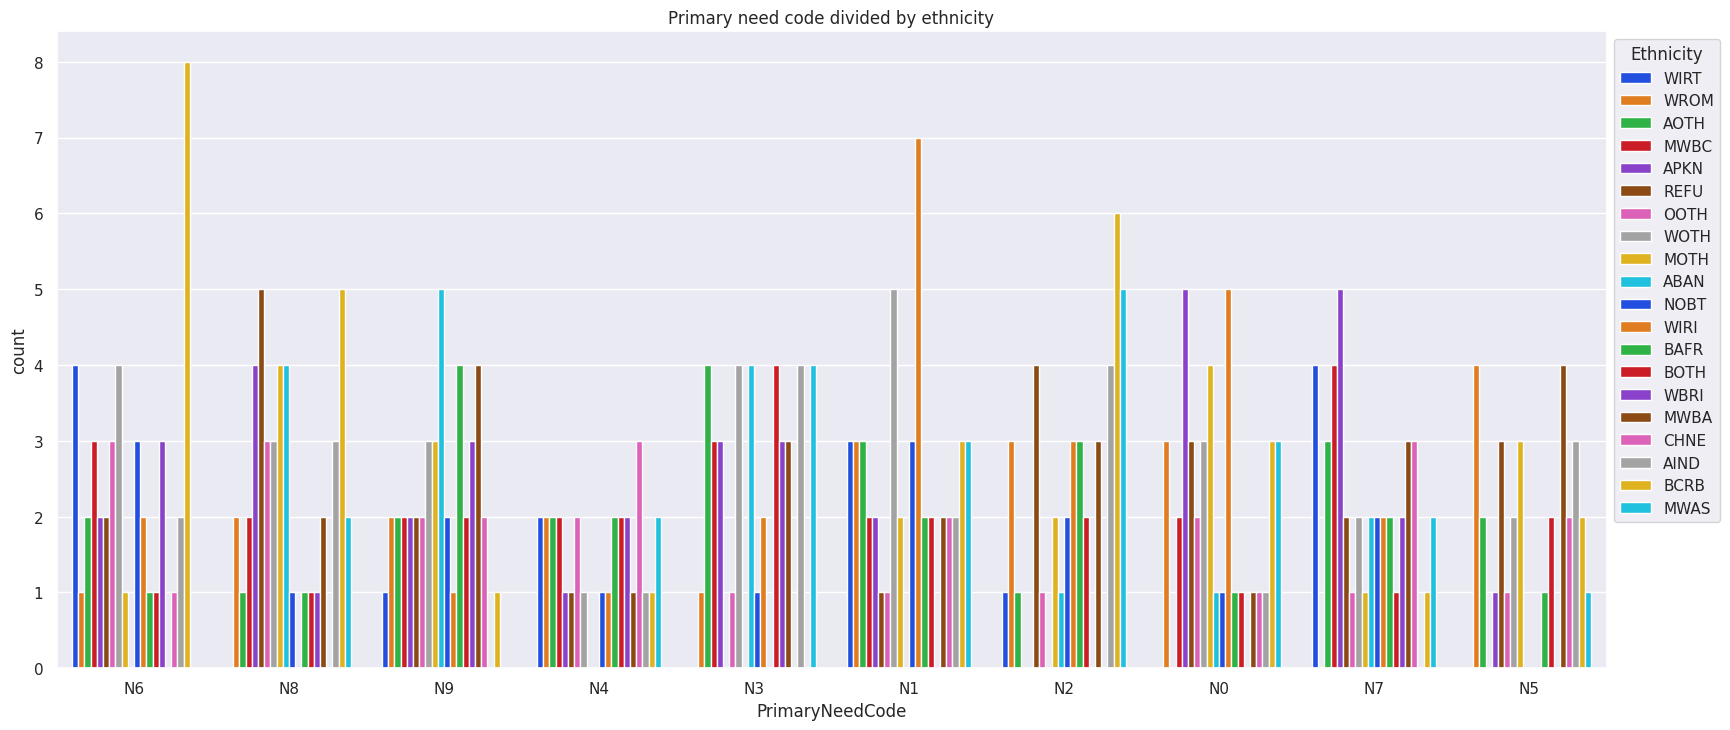

In [6]:
'''Day to day workshop explaining how to merge tables, write functions, slice dataframes, and plot a bar chart.'''

import pandas as pd

#from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import matplotlib.dates as mdates


# Getting data in from CSVs to dataframes
ChildIdentifiers = pd.read_csv('/workspaces/LA-Analyst-Tinkering/FAKE-CIN-DATA/FakeChildIdentifiers.csv')
CINdetails = pd.read_csv('/workspaces/LA-Analyst-Tinkering/FAKE-CIN-DATA/FakeCINdetails.csv')
ChildCharacteristics = pd.read_csv('/workspaces/LA-Analyst-Tinkering/FAKE-CIN-DATA/FakeChildCharacteristics.csv')

#Checking the data in the dataframes
#print(CINdetails)
#print(ChildIdentifiers)
#print(ChildCharacteristics)

# Merging ChildIdentifiers and ChildCharacteristics
ChildIDchar = ChildIdentifiers.merge(ChildCharacteristics, on="LAchildID", how="left")
ChildMerged = ChildIDchar.merge(CINdetails, on="LAchildID", how="left")

ChildData = ChildMerged[['Ethnicity', 'PrimaryNeedCode']]
#print(ChildData)

# Finding the unique ethnicities and making a list of them
#print(ChildIDchar["Ethnicity"].unique())
ethnicities = ChildIDchar["Ethnicity"].unique()
#print(ethnicities)

# Making the new ethnicity specific dataframes
ethnicity_dfs = {}
for ethnicity in ethnicities:
    ethnicity_dfs[ethnicity] = ChildData[ChildData["Ethnicity"] == ethnicity]

#print(ethnicity_dfs)

# Making one plot for one ethnicity dataframe
# sns.countplot(ethnicity_dfs['WIRT'], x='PrimaryNeedCode')
# plt.title('WIRT')
# plt.xlabel('Primary need code')
# plt.ylabel('Count')
# plt.show()

# Showing how we can re-use the same code in a function to do it multiple times.
def plot_maker(title, df):
    '''This function allows the plottng of ethnicity dataframes for primary need code'''
    sns.countplot(df, x='PrimaryNeedCode') 
    plt.title(title) # We need to make things like the title and the data change per input to it's reusable.
    plt.xlabel('Primary need code')
    plt.ylabel('Count')
    plt.show()

# Testing with just 1 dataframe
#plot_maker('WIRT', ethnicity_dfs['WIRT'])

#Showing we can make them all easily with a for loop.
# for key, value in ethnicity_dfs.items():
#     plot_maker(key, value)

# Showing how the seaborn hue feature works
g = sns.countplot(ChildData, x='PrimaryNeedCode', hue='Ethnicity', palette='bright')
sns.set(rc={'figure.figsize':(20,10)})
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title('Primary need code divided by ethnicity')
plt.show()


    





An r value of around -0.2 indicates a small negative association between birth date and time between CIN referral and CIN plan closure.